# Red Wine Quality Prediction

### Importing the data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [5]:
df=pd.read_csv('winequality-red.csv')

In [6]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### About columns

1.fixed acidity-most acids involved with wine or fixed or nonvolatile (do not evaporate readily) 

2.volatile acidity-the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

3.citric acid- to increase acidity, complement a specific flavor or prevent ferric hazes. It can be added to finished wines
to increase acidity and give a “fresh” flavor.

4.residual sugar-Sweetness in wine is called residual sugar and is usually measured in grams per litre (g/L).

5.chlorides-Wine contains from 2 to 4 g L–1 of salts of mineral acids, along with some organic acids,

6.free sulfur dioxide-otal Sulfur Dioxide (TSO2) is the portion of SO2 that is free in the wine plus the portion that
is bound to other chemicals in the wine such as aldehydes, pigments, or sugar

7.total sulfur dioxide-Total Sulfur Dioxide (TSO2) is the portion of SO2 that is free in the wine plus the portion
that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars.

8.density-The typical density or specific gravity of the must (the term we give to wine before we add or pitch the yeast) is generally between 1.080 and 1.090. This essentially means your wine is 8-9% more dense than 

9.pH-the pH level of a wine ranges from 3 to 4. Red wines with higher acidity are more likely to be a bright ruby color, as the lower pH gives them a red hue. Higher pH, less-acidic red wines can take on a blue or purple hue.

10.Sulphates-Most people can safely consume the sulfites found in wine with minimal risk of adverse side effects.

11.alcohol-The alcohol content usually ranges from 12–15%. Consuming moderate amounts of red wine has been shown to have health  benefits. This is mainly due to its high content of powerful antioxidants. 

11.quality-

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

INFERENCE: Dataset  doesn't  have any null value

<AxesSubplot:>

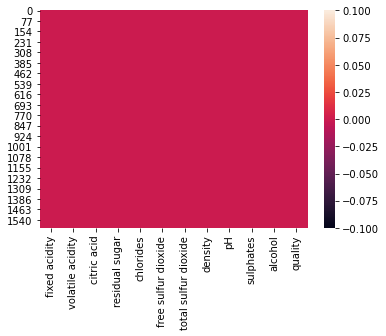

In [9]:
import seaborn as sns
sns.heatmap(df.isnull())

In [10]:
for i in df.columns:
    print(df[i].value_counts())


7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
4.6      1
13.5     1
4.9      1
15.9     1
14.3     1
Name: fixed acidity, Length: 96, dtype: int64
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
0.975     1
0.845     1
0.865     1
1.180     1
1.115     1
Name: volatile acidity, Length: 143, dtype: int64
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
1.00      1
0.72      1
0.71      1
0.78      1
0.79      1
Name: citric acid, Length: 80, dtype: int64
2.00    156
2.20    131
1.80    129
2.10    128
1.90    117
       ... 
3.45      1
2.85      1
7.00      1
5.40      1
7.30      1
Name: residual sugar, Length: 91, dtype: int64
0.080    66
0.074    55
0.078    51
0.076    51
0.084    49
         ..
0.148     1
0.467     1
0.341     1
0.147     1
0.159     1
Name: chlorides, Length: 153, dtype: int64
6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11.0     59
1

In [11]:
#the complete information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# EDA

Text(0.5, 1.0, 'quality')

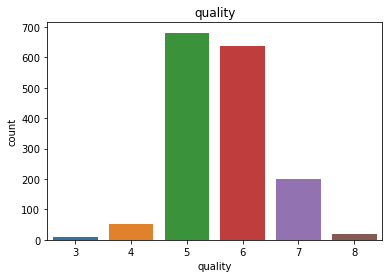

In [13]:
sns.countplot(df['quality'])
plt.title('quality')

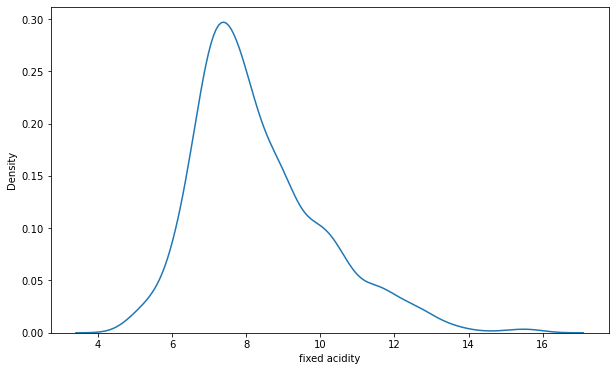

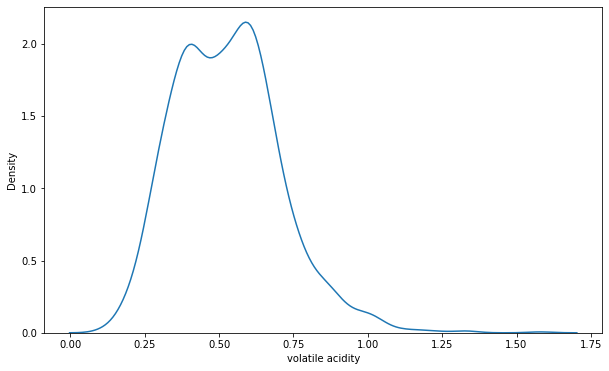

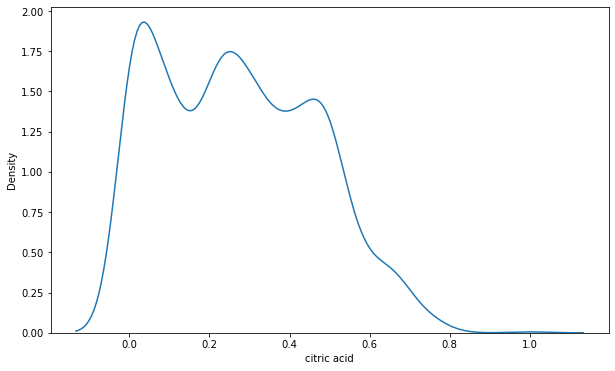

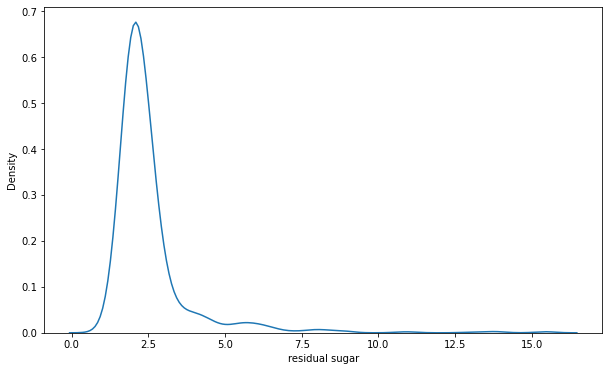

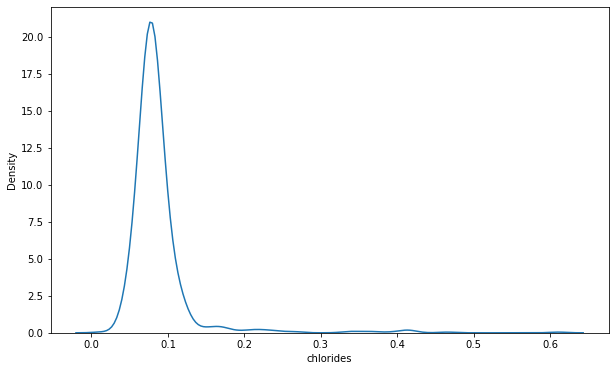

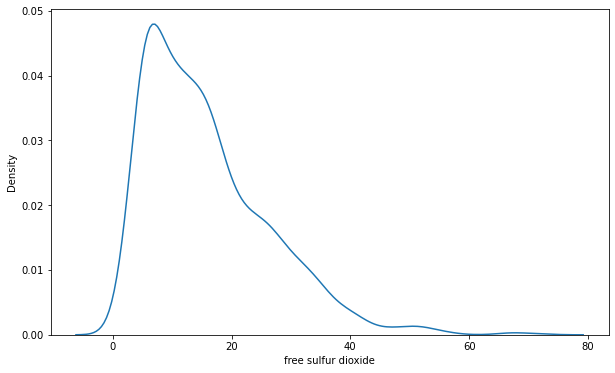

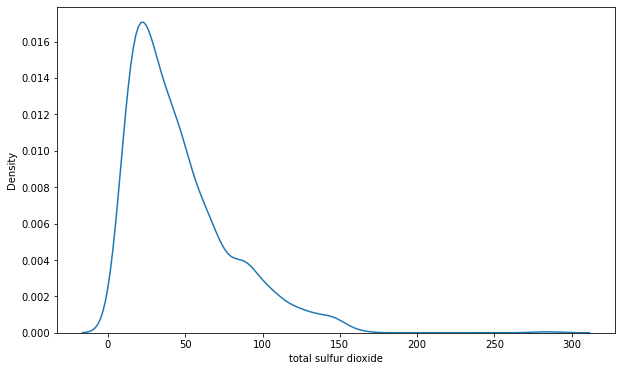

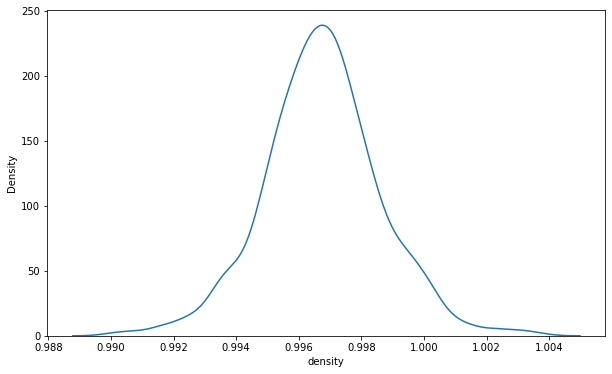

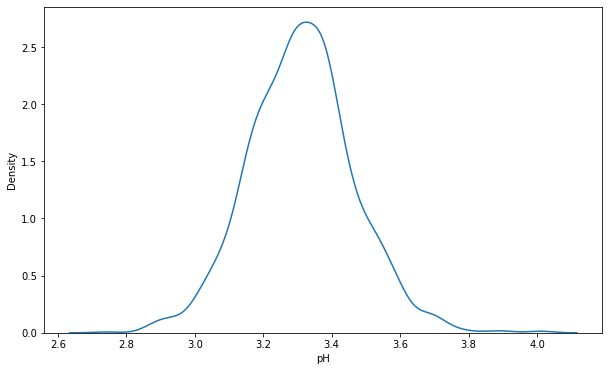

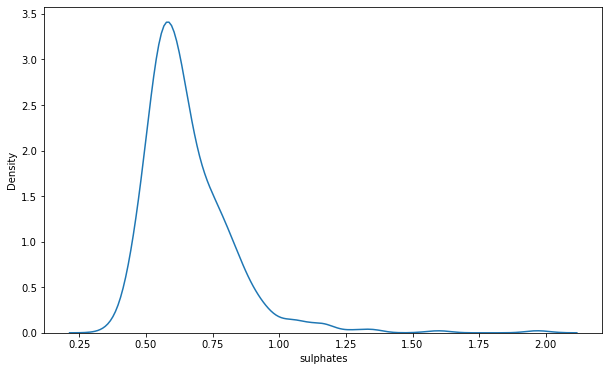

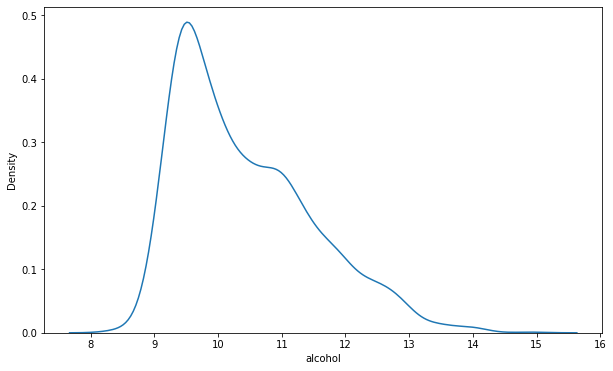

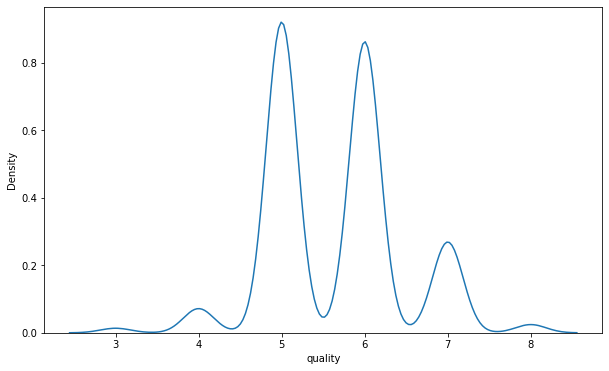

In [14]:
for i in df.columns:
    plt.figure(figsize=[10,6])
    sns.kdeplot(df[i])

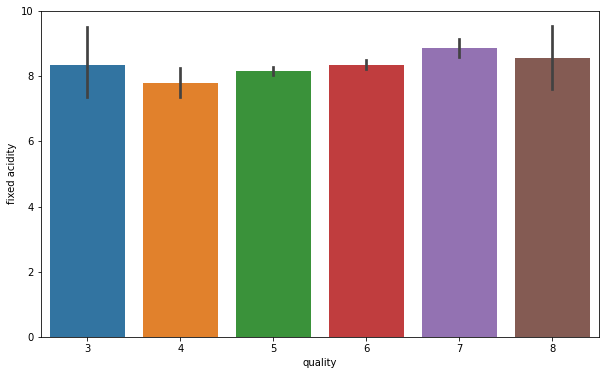

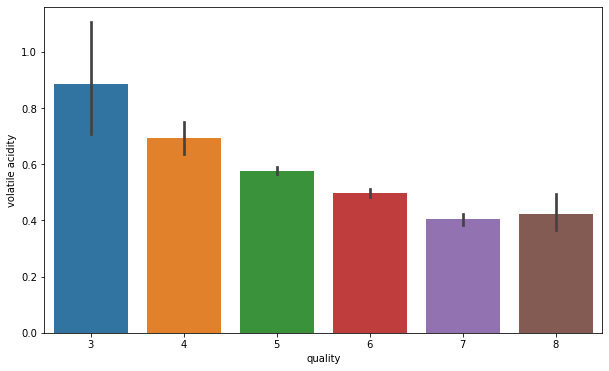

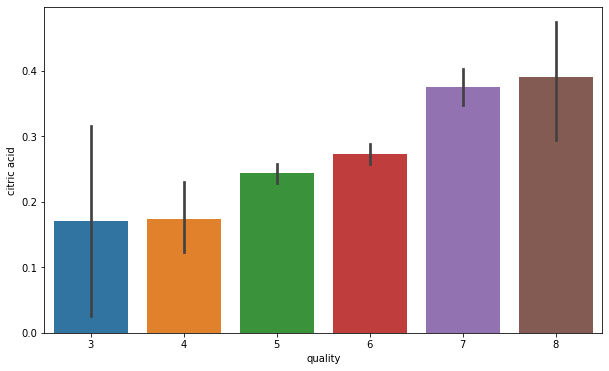

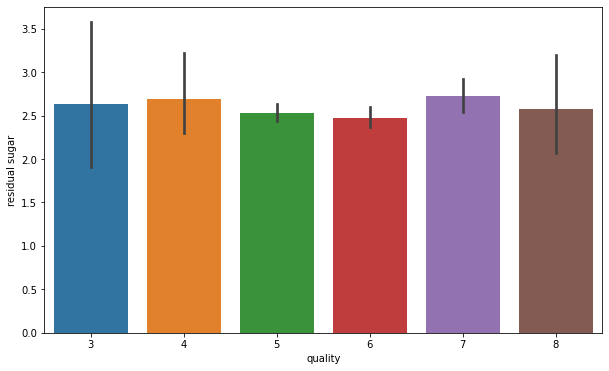

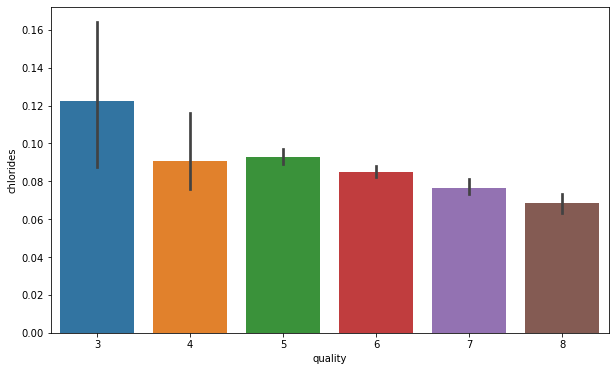

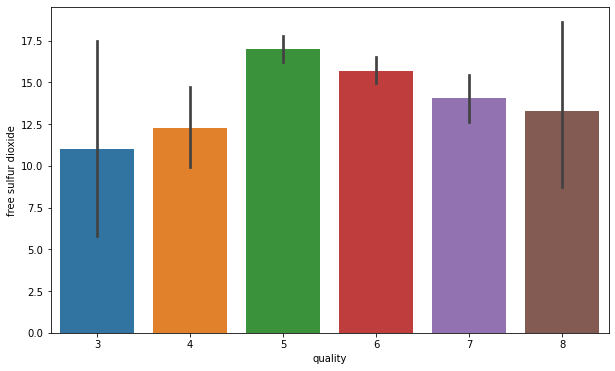

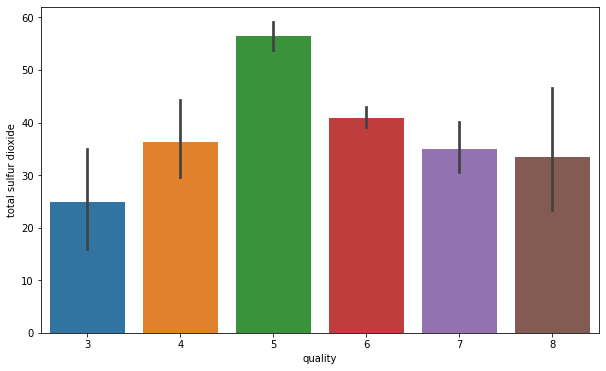

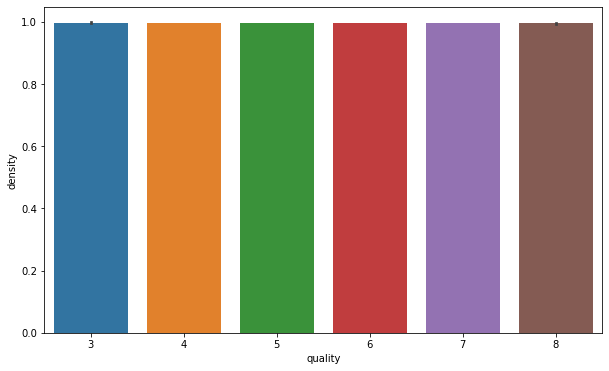

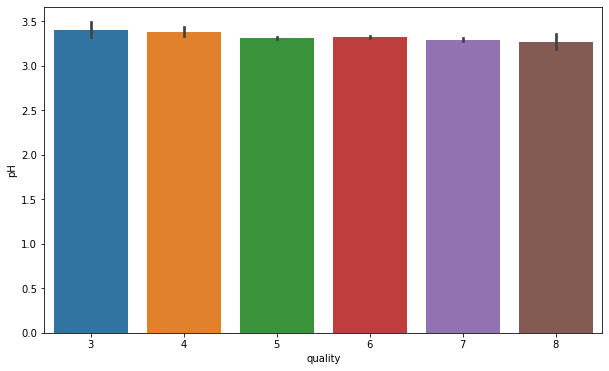

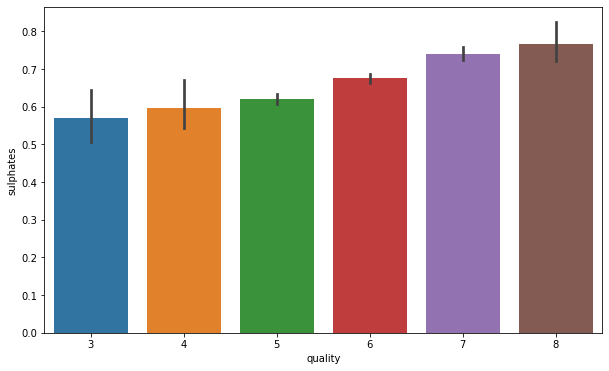

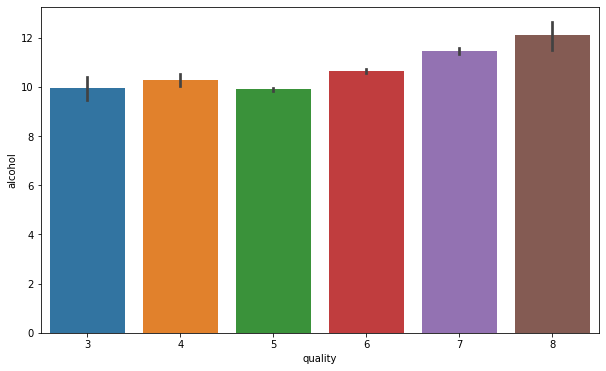

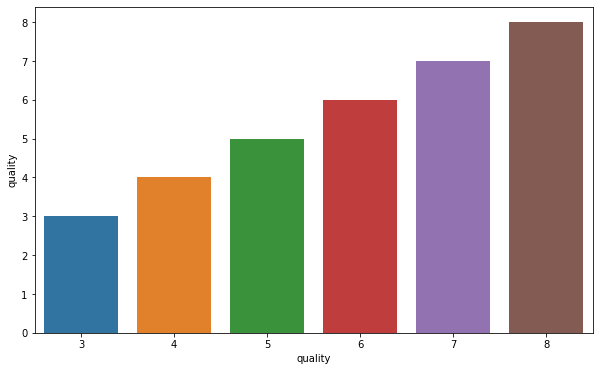

In [15]:
for i in df.columns:
    plt.figure(figsize=[10,6])
    sns.barplot(x='quality',y=i,data=df)

No handles with labels found to put in legend.


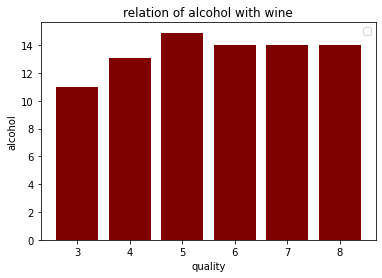

In [17]:
# checking the variation of fixed acidity in the different qualities of wine

plt.bar(df['quality'], df['alcohol'], color = 'maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

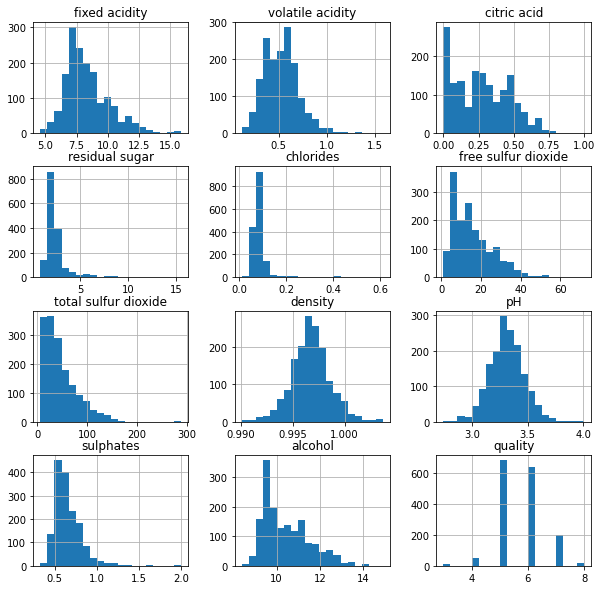

In [18]:
#plot histogram
df.hist(bins=20,figsize=(10,10))
#plot showing
plt.show()

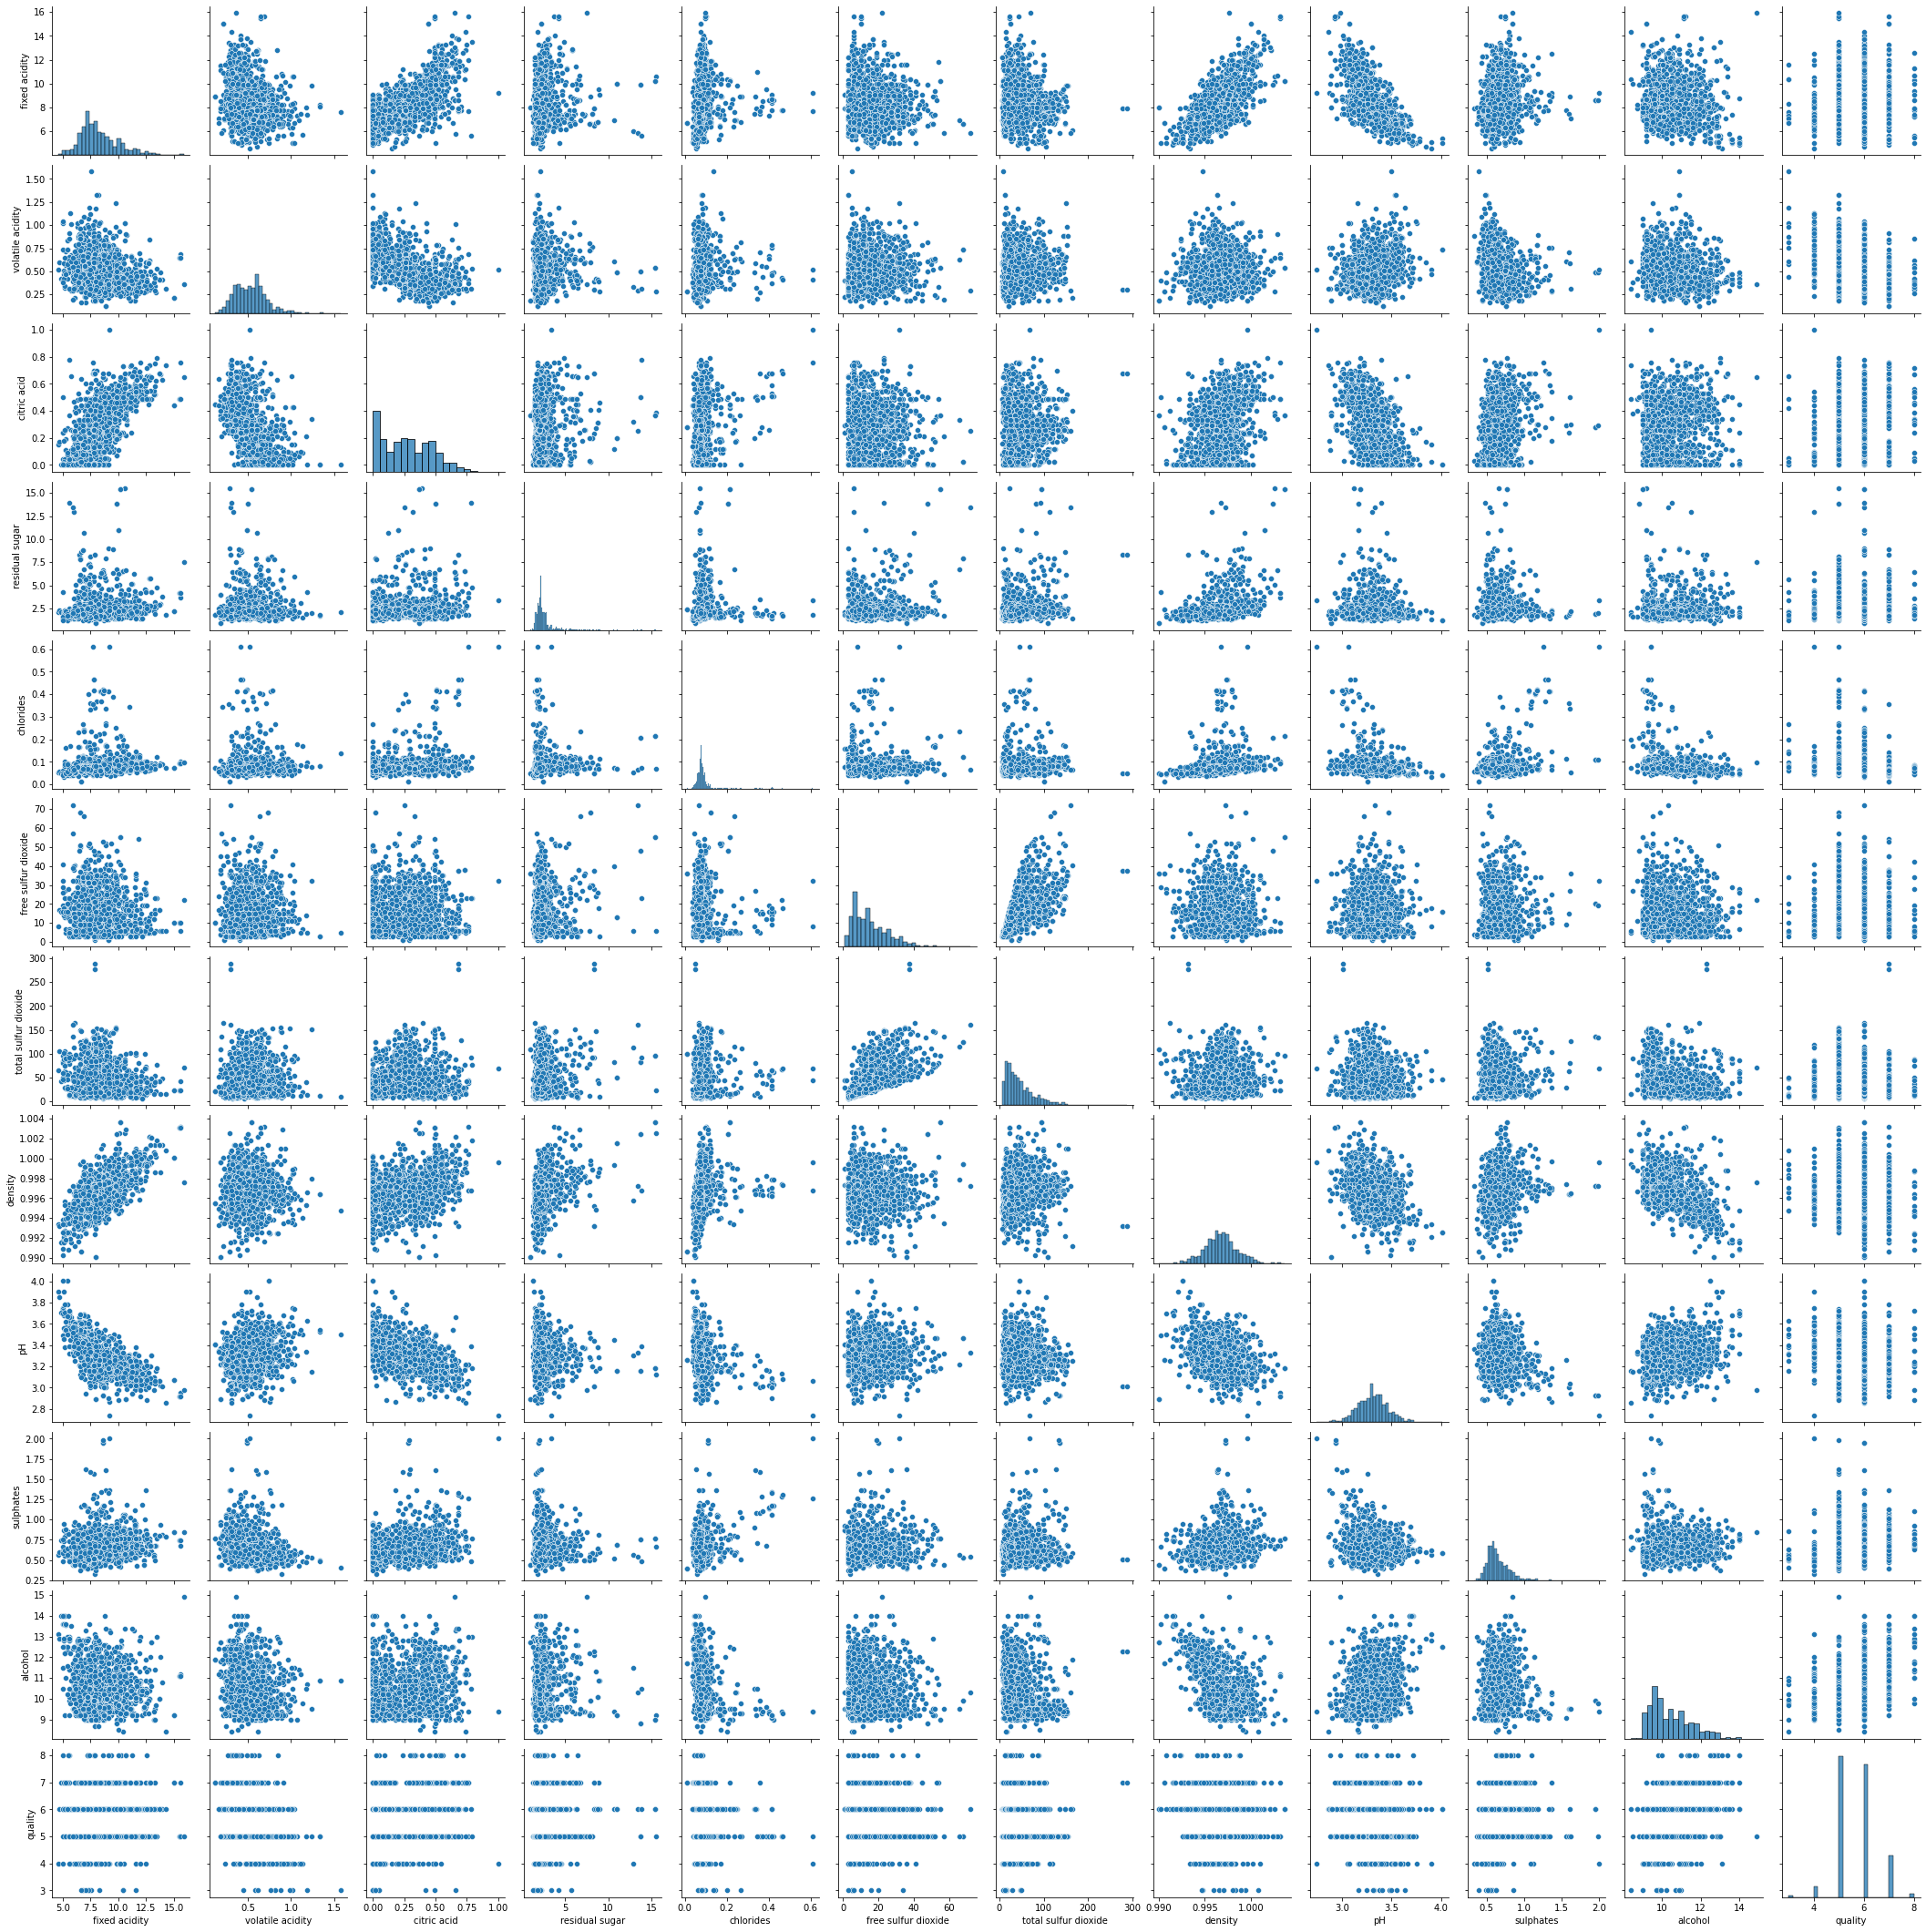

In [19]:
sns.pairplot(df)

# correlation

In [20]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

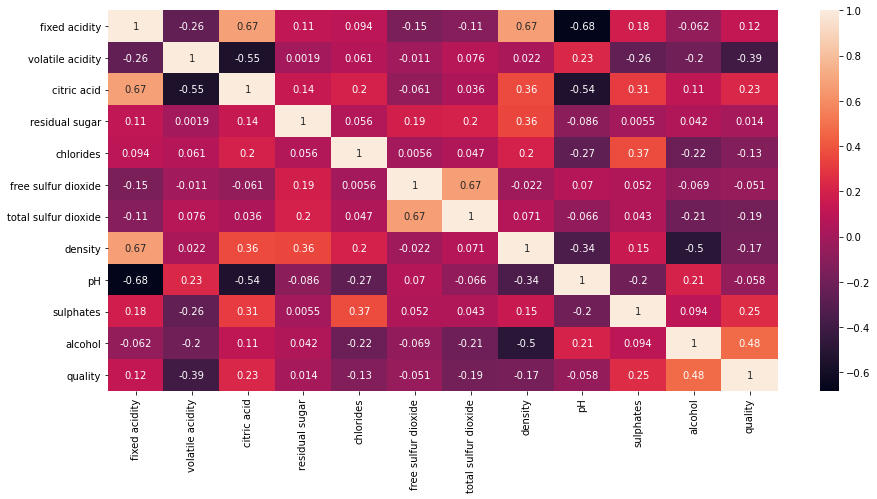

In [21]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

# Outcome of correlation

From this correlation visualization, we will find which features are correlated with other features.

1.fixed acidity has 0.12 correlated with quality of wine

2.volatile acidity has negeative coorelation with quality have -0.39.

3.citric acid has 0.23 with quality have good correlation

4.residual sugar hsa 0.014 eith quality.

5.chlorides has a negative correlation.

6.free sulfur dioxide- -0.13 has negative coorlation

7.densit and ph have (-0.174919) and (-0.05) correlated with qualily.


8.sulphates has 0.25 correlation with quality which good corelation.

9.alcohol have very good corelation with quality.

The strongly correlated items are: 1.fixed acidity and citric acid. 2.free sulphur dioxide and total sulphor dioxide. 3.fixed acidity and density.


max correlation :citric acid,sulphates,alcohol

min correlation: volatile acidity,total sulfur dioxide

# Describing Datasets

In [22]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Outliers checking

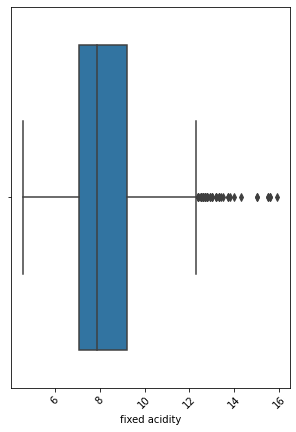

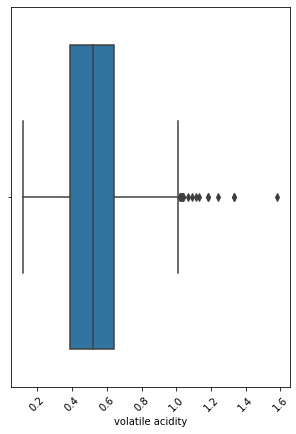

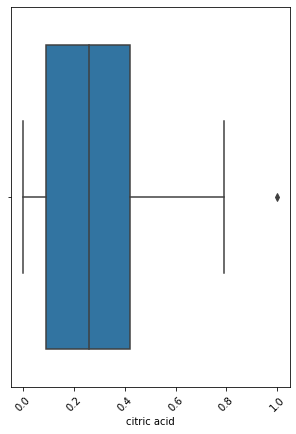

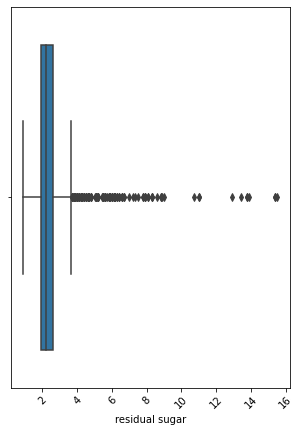

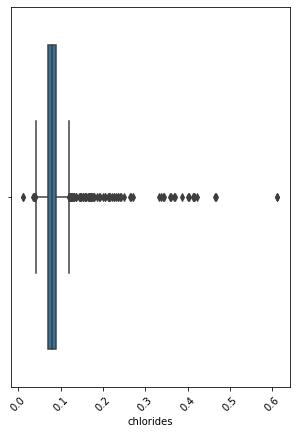

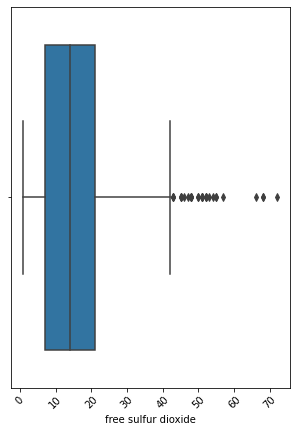

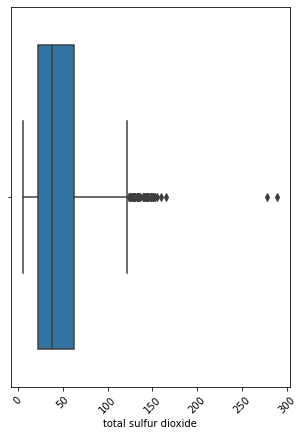

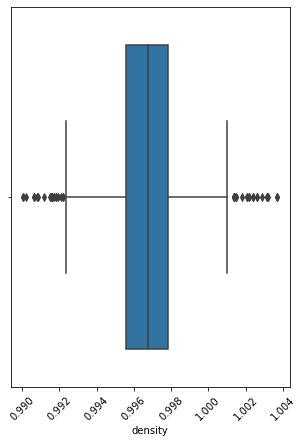

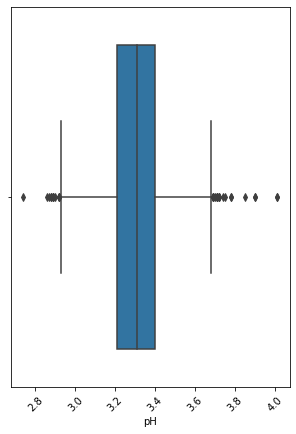

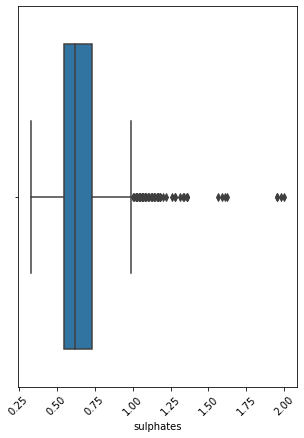

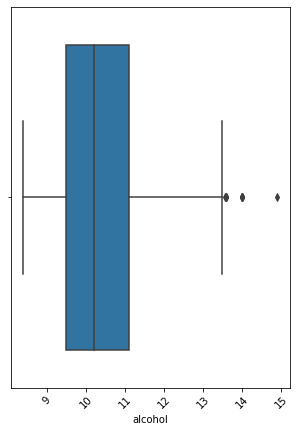

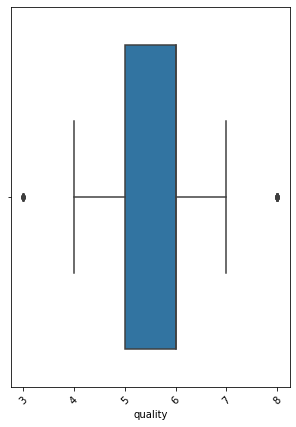

In [24]:

for column in df.columns:
    plt.figure(figsize=(5,7))
    sns.boxplot(x=df[column])
    plt.xticks(rotation=45)
    plt.show()

# Skewness

In [25]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

# Normal Distribution Curve

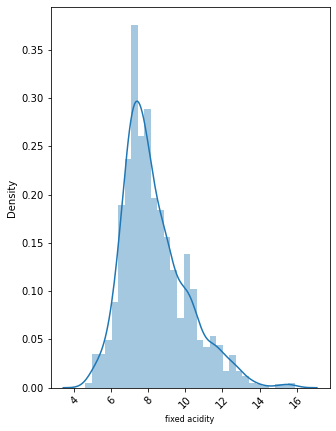

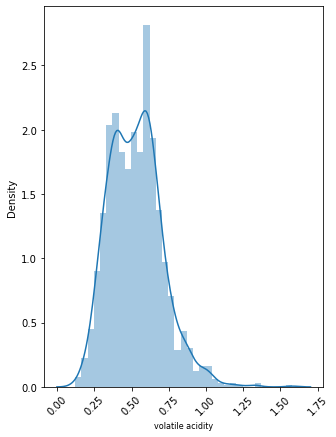

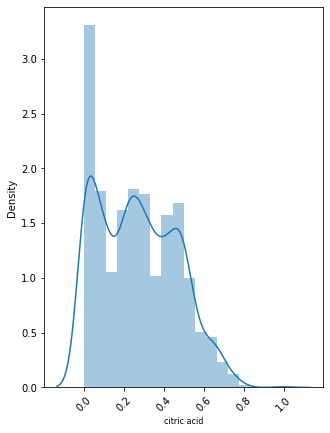

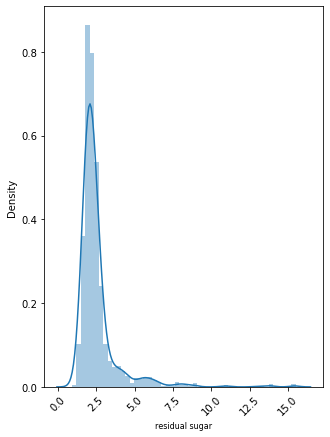

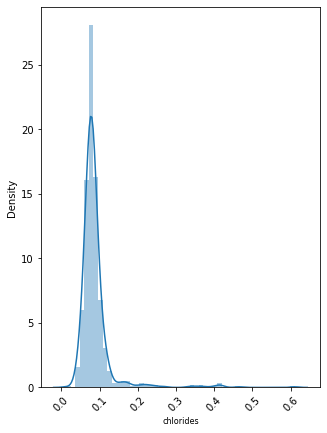

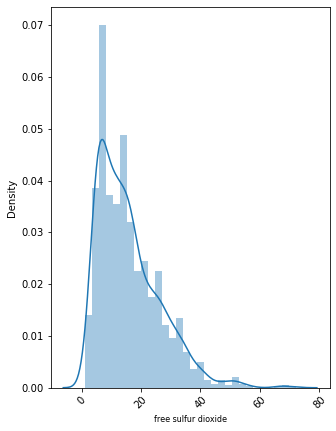

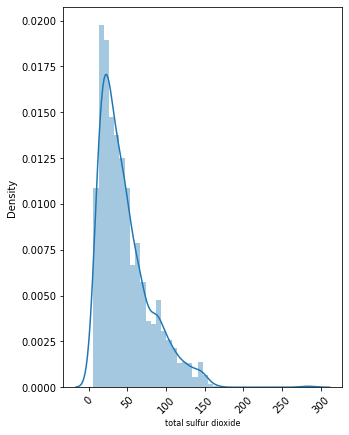

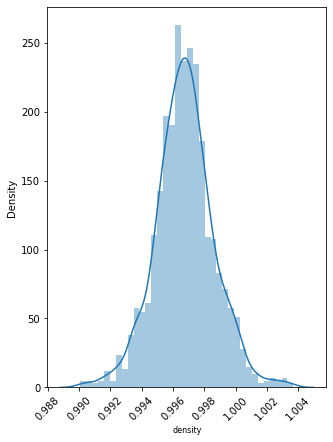

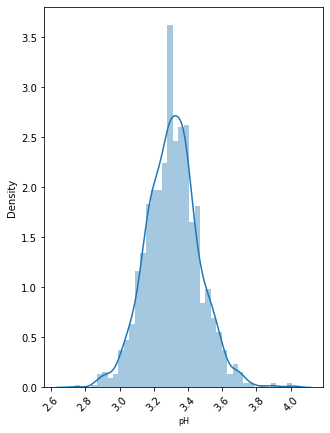

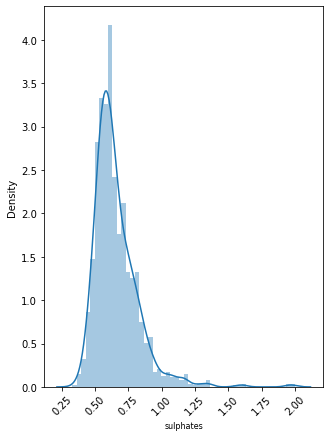

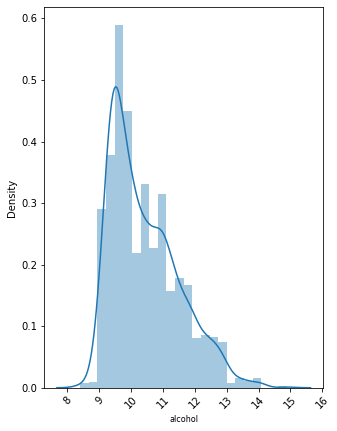

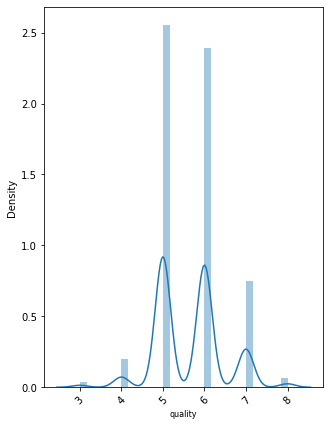

In [26]:
for column in df.columns:
    plt.figure(figsize=(5,7))
    sns.distplot(x=df[column])
    plt.xticks(rotation=45)
    plt.xlabel(column,fontsize=8)
    plt.show()

# Pre_processing

In [27]:
bins=(2,6,8)
group_names=['notgood','good']
df['quality']=pd.cut(df['quality'],bins=bins,labels=group_names)

In [28]:
df['quality']

0       notgood
1       notgood
2       notgood
3       notgood
4       notgood
         ...   
1594    notgood
1595    notgood
1596    notgood
1597    notgood
1598    notgood
Name: quality, Length: 1599, dtype: category
Categories (2, object): ['notgood' < 'good']

In [29]:
# analyzing the different values present in the dependent variable(quality column)
df['quality'].value_counts()

notgood    1382
good        217
Name: quality, dtype: int64

In [30]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,notgood
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,notgood
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,notgood
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,notgood
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,notgood
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,notgood
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,notgood
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,notgood
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,notgood


# Encoding

In [31]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['quality']= label_encoder.fit_transform(df['quality'])
 
df['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       1
       ..
1594    1
1595    1
1596    1
1597    1
1598    1
Name: quality, Length: 1599, dtype: int32>

Text(0.5, 1.0, 'quality')

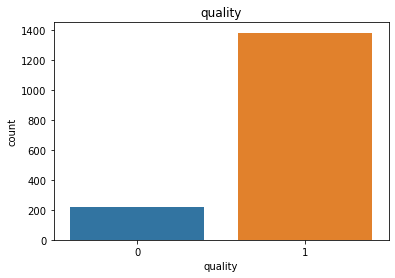

In [32]:
sns.countplot(df['quality'])
plt.title('quality')

# Data Cleaning

### Drop the column

In [33]:
df_new=df.drop(['volatile acidity'],axis=1)

In [34]:
df_new

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


# Pre processing

In [35]:
#dividing data in feauture and vector
x=df_new.drop(['quality'],axis=1)
y=df_new['quality']
# determining the shape of x and y.
print(x.shape)
print(y.shape)

(1599, 10)
(1599,)


# Transforming data to remove skewness:

In [36]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# Model construction

### LogisticRegression

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [39]:
# dividing the dataset in training and testing set

#from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)

# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1199, 10)
(1199,)
(400, 10)
(400,)


In [40]:
# creating the model
model_lg = LogisticRegression()

# feeding the training set into the model
model_lg.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_lg.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_lg.score(x_train, y_train))
print("Testing accuracy :", model_lg.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.8807339449541285
Testing accuracy : 0.855
              precision    recall  f1-score   support

           0       0.34      0.20      0.26        49
           1       0.89      0.95      0.92       351

    accuracy                           0.85       400
   macro avg       0.62      0.57      0.59       400
weighted avg       0.83      0.85      0.84       400

[[ 10  39]
 [ 19 332]]


In [52]:
from sklearn.model_selection import GridSearchCV, cross_val_score
lg_cv=cross_val_score(model_lg,x,y,scoring='accuracy', cv = 3).mean()
lg_cv


0.866166353971232

# RandomForestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
model_rfc = RandomForestClassifier(n_estimators = 200)

# feeding the training set into the model
model_rfc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_rfc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_rfc.score(x_train, y_train))
print("Testing accuracy :", model_rfc.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.905


In [54]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.51      0.57        49
           1       0.93      0.96      0.95       351

    accuracy                           0.91       400
   macro avg       0.79      0.74      0.76       400
weighted avg       0.90      0.91      0.90       400

[[ 25  24]
 [ 14 337]]


In [55]:
#Now lets try to do some evaluation for random forest model using cross validation.

rfc_cv = cross_val_score(estimator = model_rfc, X = x_train, y = y_train, cv = 10)
rfc_cv.mean()

0.9032703081232494

# SVC

In [56]:
from sklearn.svm import SVC

# creating the model
model_svc = SVC()

# feeding the training set into the model
model_svc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_svc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_svc.score(x_train, y_train))
print("Testing accuracy :", model_svc.score(x_test, y_test))

Training accuracy : 0.8974145120934112
Testing accuracy : 0.8875


In [57]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.27      0.37        49
           1       0.90      0.97      0.94       351

    accuracy                           0.89       400
   macro avg       0.75      0.62      0.65       400
weighted avg       0.87      0.89      0.87       400

[[ 13  36]
 [  9 342]]


In [47]:
svc_cv = cross_val_score(estimator = model_svc, X = x_train, y = y_train, cv = 10)
svc_cv.mean()

0.8799299719887955

# DecisionTreeClassifier

In [58]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model_dt = DecisionTreeClassifier()

# feeding the training set into the model
model_dt.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_dt.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_dt.score(x_train, y_train))
print("Testing accuracy :", model_dt.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.8675


In [59]:
#Now lets try to do some evaluation for decision tree model using cross validation.

dt_cv = cross_val_score(estimator = model_dt, X = x_train, y = y_train, cv = 10)
dt_cv.mean()

0.8674019607843138

The best model accoding to accuracy score- cross validation sccore is "RandomForestClassifier" since it is having least difference

# Hyper Parameter tuning

In [62]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,1000,50],
    'min_samples_split':[2,3,4],
     'random_state':[10]              
}

In [63]:
rf=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)
rf.fit(x_train,y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [200, 1000, 50],
                         'random_state': [10]},
             scoring='accuracy', verbose=2)

In [64]:
rf.best_params_

{'criterion': 'gini',
 'min_samples_split': 2,
 'n_estimators': 1000,
 'random_state': 10}

In [65]:
clf= RandomForestClassifier(criterion='gini',min_samples_split=3,n_estimators=200,random_state=10).fit(x_train, y_train)
fianlRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,fianlRFC)
randomforest_accu
#print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, fianlRFC))
print(randomforest_accu)

              precision    recall  f1-score   support

           0       0.66      0.51      0.57        49
           1       0.93      0.96      0.95       351

    accuracy                           0.91       400
   macro avg       0.80      0.74      0.76       400
weighted avg       0.90      0.91      0.90       400

0.9075


In [66]:
print(randomforest_accu)

0.9075


In [67]:
randomforest_cv= cross_val_score(clf,x,y,scoring='accuracy', cv = 3).mean()
randomforest_cv

0.8717948717948717

# Evaluation

AUC ROC CURVE

In [68]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

model1 = RandomForestClassifier()



# fit model
model1.fit(x_train, y_train)


# predict probabilities
pred_prob1 = model1.predict_proba(x_test)

In [69]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [70]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])


print(auc_score1)

0.8930461073318217


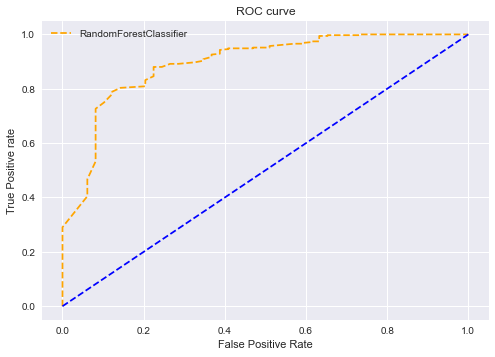

In [71]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Saving the model

In [73]:
import joblib
joblib.dump(fianlRFC,"final model.pkl")

['final model.pkl']